In [73]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import naive_bayes as nb

%matplotlib inline


In [74]:
trainMatrix, tokenlist, trainCategory = nb.readMatrix('spam_data/MATRIX.TRAIN')

In [76]:
state = nb.nb_train(trainMatrix, trainCategory)

In [77]:
state.keys()

dict_keys(['phi_yeq0', 'phi_yeq1', 'phi'])

The top words most indicative of spam emails, kind of makes sense.

In [84]:
tokens = np.array(tokenlist)
tokens[np.argsort(state['phi_yeq1'] / state['phi_yeq0'])[::-1]][:50]

array(['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet', 'diploma', 'dvd',
       'websit', 'click', 'lowest', 'numberpx', 'arial', 'helvetica',
       'serif', 'nashua', 'amherst', 'mortgag', 'refin', 'charset',
       'newslett', 'customerservic', 'numberpt', 'iso', 'web', 'lender',
       'numberd', 'loan', 'dailybargainmail', 'coral', 'html', 'unsolicit',
       'www', 'fl', 'holidai', 'equiti', 'tal', 'consolid', 'bachelor',
       'sweepstak', 'subscript', 'mba', 'bonu', 'ae', 'refinanc', 'hover',
       'mime', 'untitl', 'subscrib', 'recur', 'postal'],
      dtype='<U16')

In [89]:
files = sorted(glob.glob('./spam_data/MATRIX.TRAIN.[0-9]*'), key = lambda s: int(s.rsplit('.')[-1]))

nb_sizes = []
nb_errs = []
mat_test, tok_test, cat_test = nb.readMatrix('./spam_data/MATRIX.TEST')
for f in files:
    mat, tok, cat = nb.readMatrix(f)
    nb_sizes.append(mat.shape[0])
    mod = nb.nb_train(mat, cat)
    output = nb.nb_test(mat_test, mod)
    nb_errs.append(nb.evaluate(output, cat_test))
    

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


Text(0, 0.5, 'Test Set Size')

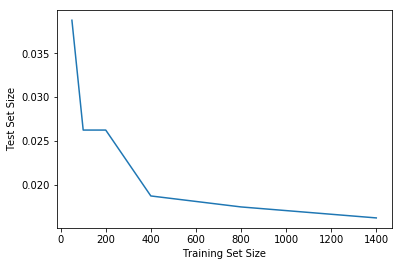

In [90]:
plt.plot(nb_sizes, nb_errs)
plt.xlabel("Training Set Size")
plt.ylabel("Test Set Size")